In [8]:
import nwslpy
import pandas as pd
import matplotlib.pyplot as plt
import math
from common import NWSL, Fonts, Images, add_twitter_handle

In [9]:
# Load all teams and season stats for the 2022 teams
teams = nwslpy.load_teams()

teams_2022 = ["CHI", "HOU", "NJY", "RGN", "ORL", "POR", "WAS", "NC", "KCC", "LOU", "LA", "SD"]
df = pd.concat(
    [nwslpy.load_team_season_stats(team, "2022") for team in teams_2022]
)
df

,team_id,season,duels_ground,possession_pct,red_cards_2nd_yellow,corners_won,recoveries,long_passes_unsuccessful,goals_outside_box,aerial_duels_lost,...,goals_away,last_updated,own_goal_conceded,own_goal_accrued,tackle_last_man,tackles_last_man,goals_set_piece,goalkicks_total,goals_other,penalties_off_target
0,2,2022,1716,52,1.0,126,1674,685,7,253,...,19,2023-02-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4,2022,1702,47,NaN,112,1707,934,3,287,...,19,2023-02-18,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
0,5,2022,1564,49,1.0,92,1558,736,1,231,...,8,2023-02-18,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,6,2022,1745,50,1.0,101,1787,725,3,264,...,13,2023-02-18,3.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
0,7,2022,1679,48,NaN,90,1527,608,1,184,...,8,2023-02-18,NaN,2.0,3.0,3.0,NaN,NaN,NaN,NaN
0,8,2022,1734,51,NaN,130,1725,762,8,255,...,22,2023-02-18,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
0,9,2022,1612,53,NaN,111,1564,588,3,239,...,11,2023-02-18,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
0,11,2022,1676,55,NaN,115,1589,648,2,231,...,19,2023-02-18,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN
0,13,2022,1831,48,1.0,121,1853,858,5,292,...,16,2023-02-18,3.0,NaN,1.0,1.0,1.0,NaN,NaN,NaN
0,14,2022,1683,49,1.0,106,1622,783,4,293,...,12,2023-02-18,NaN,1.0,1.0,1.0,2.0,173.0,NaN,NaN


In [3]:
df = (
    df.groupby("team_id")
    .agg({"woodwork_hit": "sum", "shots_on_target": "sum", "goals": "sum"})
    .join(teams)
)
df = df.sort_values("woodwork_hit", ascending=False)
df

,woodwork_hit,shots_on_target,goals,team_name,team_name_short,team_club_name,team_abbreviation,first_season,last_season,last_updated
team_id,,,,,,,,,,
6,16,136,32,OL Reign,OL Reign,OL Reign,RGN,2016,2022,2023-02-18
4,15,102,36,Houston Dash,Houston Dash,Houston Dash,HOU,2016,2022,2023-02-18
2,12,110,35,Chicago Red Stars,Chicago Red Stars,Chicago Red Stars,CHI,2016,2022,2023-02-18
5,12,74,16,NJ/NY Gotham FC,NJ/NY Gotham FC,Gotham FC,NJY,2016,2022,2023-02-18
9,12,110,26,Washington Spirit,Washington Spirit,Washington Spirit,WAS,2016,2022,2023-02-18
16,12,114,35,San Diego Wave FC,San Diego Wave FC,San Diego Wave,SD,2022,2022,2023-02-18
8,11,170,53,Portland Thorns FC,Portland Thorns FC,Portland Thorns,POR,2016,2022,2023-02-18
7,8,79,22,Orlando Pride,Orlando Pride,Orlando Pride,ORL,2016,2022,2023-02-18
11,8,119,46,North Carolina Courage,North Carolina Courage,North Carolina Courage,NC,2017,2022,2023-02-18


In [4]:
df["woodwork_to_shots"] = df["woodwork_hit"]/df["shots_on_target"]
df["woodwork_to_goals"] = df["woodwork_hit"]/df["goals"]
df

,woodwork_hit,shots_on_target,goals,team_name,team_name_short,team_club_name,team_abbreviation,first_season,last_season,last_updated,woodwork_to_shots,woodwork_to_goals
team_id,,,,,,,,,,,,
6,16,136,32,OL Reign,OL Reign,OL Reign,RGN,2016,2022,2023-02-18,0.117647,0.500000
4,15,102,36,Houston Dash,Houston Dash,Houston Dash,HOU,2016,2022,2023-02-18,0.147059,0.416667
2,12,110,35,Chicago Red Stars,Chicago Red Stars,Chicago Red Stars,CHI,2016,2022,2023-02-18,0.109091,0.342857
5,12,74,16,NJ/NY Gotham FC,NJ/NY Gotham FC,Gotham FC,NJY,2016,2022,2023-02-18,0.162162,0.750000
9,12,110,26,Washington Spirit,Washington Spirit,Washington Spirit,WAS,2016,2022,2023-02-18,0.109091,0.461538
16,12,114,35,San Diego Wave FC,San Diego Wave FC,San Diego Wave,SD,2022,2022,2023-02-18,0.105263,0.342857
8,11,170,53,Portland Thorns FC,Portland Thorns FC,Portland Thorns,POR,2016,2022,2023-02-18,0.064706,0.207547
7,8,79,22,Orlando Pride,Orlando Pride,Orlando Pride,ORL,2016,2022,2023-02-18,0.101266,0.363636
11,8,119,46,North Carolina Courage,North Carolina Courage,North Carolina Courage,NC,2017,2022,2023-02-18,0.067227,0.173913


<ipython-input-5-bec6457c3255>:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


<Figure size 432x288 with 0 Axes>

<Figure size 12000x8400 with 0 Axes>

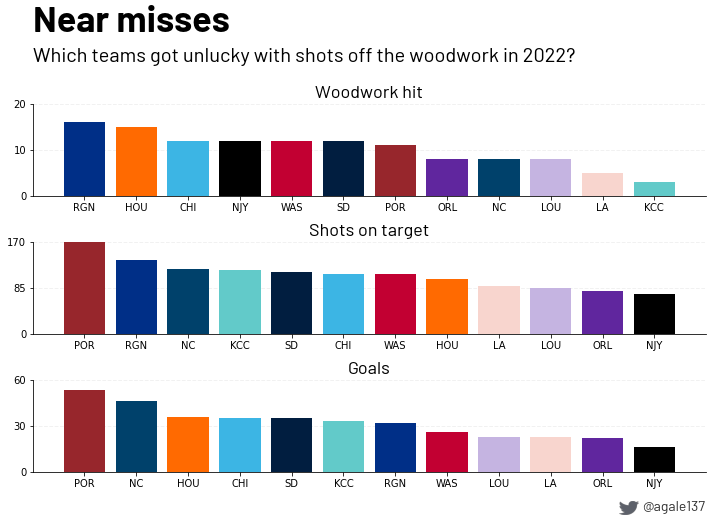

In [5]:
plt.clf()
plt.rcParams["figure.figsize"] = (10, 7)
plt.figure(dpi=1200, facecolor="white")
fig, axs = plt.subplots(4, 1, height_ratios=[1, 5, 5, 5])
fig.patch.set_facecolor("white")


def plot_metric(ax, m):
    data = df.sort_values(m, ascending=False)

    # Plot data
    ax.bar(
        data["team_abbreviation"],
        data[m],
        color=[NWSL.color(team) for team in data["team_abbreviation"]],
    )

    # Title
    ax.set_title(
        m.replace("_", " ").capitalize(),
        fontproperties=Fonts.BARLOW,
        size=18,
    )

    # Ticks and axes
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    # ax.set_xlim(df_group["dob_" + m].min() - 0.5, df_group["dob_" + m].max() + 0.5)
    ymax = math.ceil(data[m].max() / 10) * 10
    ax.set_ylim(0, ymax)
    ax.set_yticks([0, ymax / 2, ymax])

    ax.set_axisbelow(True)
    ax.grid(which="both", axis="y", ls="--", color="#F1F1F1", linewidth=1)


# Plot each metric
plot_metric(axs[1], "woodwork_hit")
plot_metric(axs[2], "shots_on_target")
plot_metric(axs[3], "goals")

# Title
axs[0].axis("off")
axs[0].set_title(
    "Near misses", fontproperties=Fonts.BARLOW_BOLD, size=36, ha="left", x=0, y=1.1
)

# Subtitle
axs[0].text(
    0,
    -0.2,
    "Which teams got unlucky with shots off the woodwork in 2022?",
    fontproperties=Fonts.BARLOW,
    size=20,
    ha="left",
    transform=axs[0].transAxes,
)

# Twitter logo and username
add_twitter_handle(fig, x=0.86, y=-0.03, fs=14, w=0.03)

# Proper spacing between subplots
fig.tight_layout()

# Save image
plt.savefig(
    "images/woodwork.png",
    bbox_inches="tight",
    transparent=False,
    pad_inches=0.5,
    dpi=200,
)

In [11]:
# Investigate double counting for Ebony Salmon
players = nwslpy.load_players()
players[players["player_last_name"] == "Salmon"]

,player_first_name,player_last_name,player_short_first_name,player_short_last_name,player_match_name,player_nationality,player_position,player_place_of_birth,player_known_name,last_updated
player_id,,,,,,,,,,
609,Ebony,Salmon,Ebony,Salmon,E. Salmon,England,Attacker,NaN,NaN,2023-02-06


In [18]:
temp = nwslpy.load_player_season_stats("LOU", "2022")
temp[temp["player_id"] == 609][["player_id", "team_id", "goals"]]

,player_id,team_id,goals
22,609,14,9


In [19]:
temp = nwslpy.load_player_season_stats("HOU", "2022")
temp[temp["player_id"] == 609][["player_id", "team_id", "goals"]]

,player_id,team_id,goals
23,609,4,9
